# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
# Import numpy and pandas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [3]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [5]:
# Your code here:

sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [6]:
# Your code here:

sensor.isnull().sum()

attitude.roll         0
attitude.pitch        0
attitude.yaw          0
gravity.x             0
gravity.y             0
gravity.z             0
rotationRate.x        0
rotationRate.y        0
rotationRate.z        0
userAcceleration.x    0
userAcceleration.y    0
userAcceleration.z    0
dtype: int64

How many rows and columns are in our data?

In [7]:
# Your code here:

sensor.shape


(1751, 12)

To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [9]:
# Your code here:
date_range_df  = pd.date_range(start='1/1/2018 00:00:00', end='1/1/2018 00:29:10', periods=len(sensor))
date_range_index  = pd.DatetimeIndex(date_range_df, freq='infer')


Assign the time series index to the dataframe's index.

In [11]:
# Your code here:
sensor.index = date_range_index
sensor.head()

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [36]:
import statsmodels.api as sm


Figure(432x288)


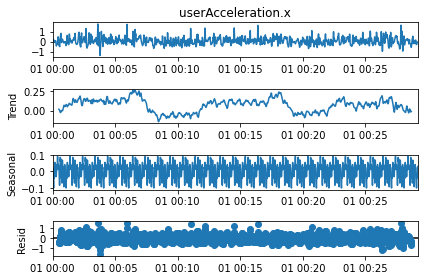

In [37]:
# Your code here:


user_acc = sensor['userAcceleration.x']
decomposition = sm.tsa.seasonal_decompose(user_acc, period=60)
print(decomposition.plot())

Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

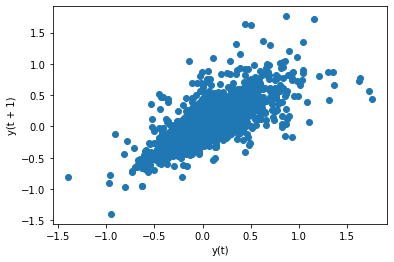

In [38]:
# Your code here:

pd.plotting.lag_plot(user_acc)


Create a lag plot for `rotationRate.x`

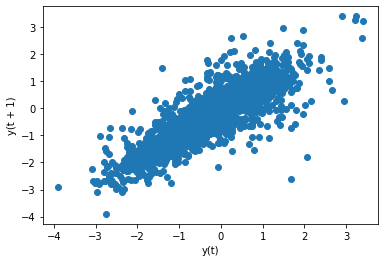

In [39]:
# Your code here:
rotation_rate = sensor['rotationRate.x']

pd.plotting.lag_plot(rotation_rate)

What are your conclusions from both visualizations?

The data is group alongside the diagonal, indicating correlation. The direction is positive implying that the correlation is as well.


The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

- In mathematics and statistics, a stationary process is a stochastic process whose unconditional joint probability distribution does not change when shifted in time

- The most common cause of violation of stationarity is a trend in the mean, which can be due either to the presence of a unit root or of a deterministic trend

In [40]:
# Your code here:
from statsmodels.tsa.stattools import adfuller

ADFtest_acc = adfuller(user_acc)
print('p value userAcceleration.x: ', ADFtest_acc[1])

ADFtest_rot = adfuller(rotation_rate)
print('p value rotationRate.x: ', ADFtest_rot[1])

#ADFtest_rot

p value userAcceleration.x:  2.823439483037563e-30
p value rotationRate.x:  6.320230335912084e-06


What are your conclusions from this test?

- Since the value of those p-values is < 0.05 the Null Hypothesis is rejected indicating the data does not have a unit root, therefore there is stationarity



In [41]:
from statsmodels.tsa.arima_model import ARMA

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [42]:
print(len(sensor['userAcceleration.x']))

1751


In [43]:
# Your code here:

reality = sensor['userAcceleration.x'][:1751-10]
future  = sensor['userAcceleration.x'][1751-10:]
model = ARMA(reality, order=(2,1))
results = model.fit()
predictions = results.predict(start=len(reality),end=len(reality)+len(future)-1, dynamic=False)
predictions

2018-01-01 00:29:01    0.173149
2018-01-01 00:29:02    0.142896
2018-01-01 00:29:03    0.100522
2018-01-01 00:29:04    0.070106
2018-01-01 00:29:05    0.056099
2018-01-01 00:29:06    0.053778
2018-01-01 00:29:07    0.056790
2018-01-01 00:29:08    0.060646
2018-01-01 00:29:09    0.063316
2018-01-01 00:29:10    0.064493
Freq: S, dtype: float64

In [48]:
results = pd.DataFrame({
    "real":future,
    "pred":predictions,
    "diff":predictions-future
})

display(results)

,real,pred,diff
2018-01-01 00:29:01,0.149749,0.173149,0.023400
2018-01-01 00:29:02,0.038461,0.142896,0.104435
2018-01-01 00:29:03,-0.169175,0.100522,0.269697
2018-01-01 00:29:04,-0.300361,0.070106,0.370467
2018-01-01 00:29:05,-0.270174,0.056099,0.326273
2018-01-01 00:29:06,-0.268367,0.053778,0.322145
2018-01-01 00:29:07,-0.102444,0.056790,0.159234
2018-01-01 00:29:08,-0.085590,0.060646,0.146236
2018-01-01 00:29:09,-0.048105,0.063316,0.111421
2018-01-01 00:29:10,-0.065011,0.064493,0.129504


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [45]:
from statsmodels.tools.eval_measures import rmse

In [50]:
# Your code here:

RSME = rmse(results.real, results.pred, axis=0)
RSME

0.22529864037417963